# FDDB 官方
### 位置
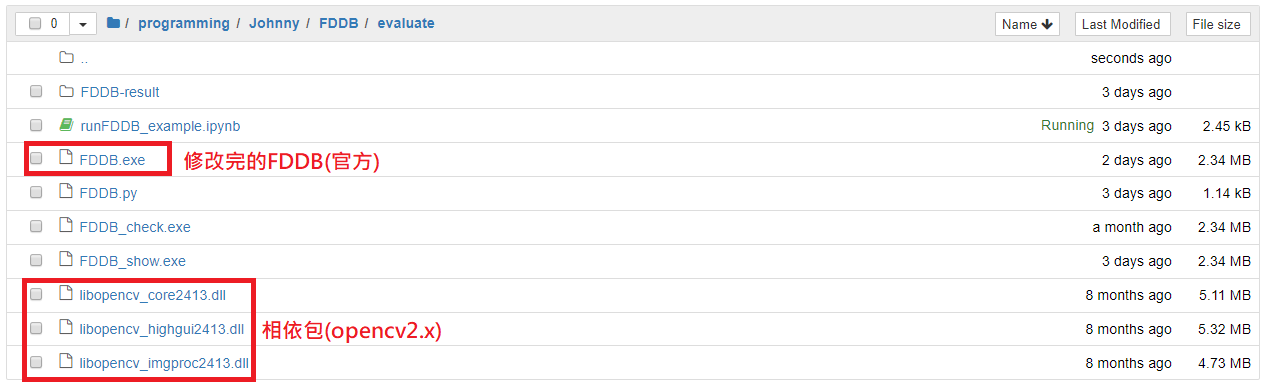
### 新增的功能
* 給定index查看特定照片的官方匹配結果
* 當index給定-1則會啟用正常的FDDB評測
    * note that : opencv的顯示無法在jupyter中(c base)
* 呼叫方式簡化到給定result.txt、要儲存的地方以及index即可
    * 若改變dataset位置，則要修改FDDB.py裡面的內容

In [1]:
# use
from FDDB import runFDDB
runFDDB(pred='./FDDB-result/result.txt', result_path=None, index=-1)

D:/programming/Johnny/FDDB/evaluate/FDDB.exe -a D:/dataset/face/FDDB/FDDB-folds/FDDB-fold-ellipseList-all.txt -d ./FDDB-result/result.txt -f 0 -i D:\dataset\face\FDDB\originalPics\ -l D:/dataset/face/FDDB/FDDB-folds/FDDB-fold-all.txt -r ./FDDB-result/ -z .jpg -s -1


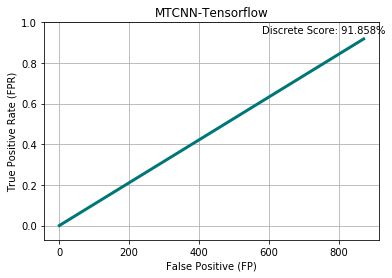

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

path_ContROC = "./FDDB-result/ContROC.txt"
path_DiscROC = "./FDDB-result/DiscROC.txt"
path_imgSave = "./FDDB-result/result.png"

set_x_lim = 1000

# get data
with open(path_DiscROC, 'r') as fp:
    discROC = fp.readlines()

# get disc data x, y
discROC = [line.split() for line in discROC]
disc_x = [float(x[1]) for x in discROC]
disc_y = [float(y[0]) for y in discROC]

# get data we need to be print
count = len(discROC)

### plot data
plt.figure()

# set y limite
plt.ylim((-0.07,1))
# plt.xlim((-2,set_x_lim))
# print label
plt.xlabel('False Positive (FP)')
plt.ylabel('True Positive Rate (FPR)')

# plot data
plt.plot(disc_x,disc_y,color = '#007777', linewidth = 3.0)

# print data text
plt.title('MTCNN-Tensorflow')
plt.text(disc_x[0] - disc_x[0] / 3,disc_y[0] + 0.03,'Discrete Score: %.3f' %(disc_y[0] * 100) + '%')

# 
plt.grid()

# save img
# plt.figure(figsize=(10, 10))
plt.savefig('./FDDB-result/result.png')
plt.show()